# Multinomial Naive Bayes

## ⬇️ Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline 
import os
import optuna
import sys
import matplotlib.pyplot as plt
import optuna.visualization.matplotlib as vis

sys.path.append(os.path.abspath(".."))

from base_preprocessing import BasePreprocessing
from tfidf_preprocessing import TFIDFPreprocessing

## ⭐ Base Preprocessing

should be available in `data/preprocessed_recipe.csv`

In [2]:
if not os.path.exists("../../data/preprocessed_recipe.csv"):
    base_preprocessor = BasePreprocessing()
    raw_data = base_preprocessor.load('../../data/RAW_recipes.csv')
    data = base_preprocessor.transform(raw_data)
    data.to_csv("../../data/preprocessed_recipe.csv")
else:
    data = pd.read_csv("../../data/preprocessed_recipe.csv")
data.head()

,Unnamed: 0,id,name,minutes,n_steps,description,n_ingredients,steps_string_standardize,ingredients_text,tags_text,cuisine,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,0,137739,arriba baked squash mexican,55,11,autumn is my favorite time of year to cook! th...,7,make a choic and proceed with recip depend on ...,"['winter squash', 'mexican seasoning', 'mixed ...","['60-minutes-or-less', 'time-to-make', 'course...",North America – United States,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,1,31490,breakfast pizza,30,9,this recipe calls for the crust to be prebaked...,6,preheat oven to 103.33 celsius °c press dough ...,"['prepared pizza crust', 'sausage patty', 'egg...","['30-minutes-or-less', 'time-to-make', 'course...",North America – United States,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,4,44061,amish tomato ketchup canning,190,5,my dh's amish mother raised him on this recipe...,8,"mix all ingredients& boil for 2 30.0 minute , ...","['tomato juice', 'apple cider vinegar', 'sugar...","['weeknight', 'time-to-make', 'course', 'main-...",North America – United States,352.9,1.0,337.0,23.0,3.0,0.0,28.0
3,5,25274,marinated olive,15,4,my italian mil was thoroughly impressed by my ...,9,toast the fennel seed and lightli crush them p...,"['fennel seeds', 'green olives', 'ripe olives'...","['15-minutes-or-less', 'time-to-make', 'course...",North America – United States,380.7,53.0,7.0,24.0,6.0,24.0,6.0
4,6,67888,barbecued rib,120,10,this recipe is posted by request and was origi...,22,in a medium saucepan combin all the ingredi fo...,"['pork spareribs', 'soy sauce', 'fresh garlic'...","['weeknight', 'time-to-make', 'course', 'main-...",North America – United States,1109.5,83.0,378.0,275.0,96.0,86.0,36.0


## 🛠️ With TFIDFPreprocessing

In [3]:
preprocessor = TFIDFPreprocessing()
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train, y_train = preprocessor.fit_transform(train_data)
X_test, y_test = preprocessor.transform(test_data)

Extracting primary cuisine...
Fitting TF-IDF vectorizers...
Fitting label encoder...
Unnamed: 0                  False
id                          False
name                         True
minutes                     False
n_steps                     False
description                 False
n_ingredients               False
steps_string_standardize    False
ingredients_text            False
tags_text                   False
cuisine                     False
calories                    False
total_fat                   False
sugar                       False
sodium                      False
protein                     False
saturated_fat               False
carbohydrates               False
dtype: bool
Starting transform process...
Removing invalid cuisines: 69842    True
78095    True
26682    True
44176    True
39769    True
         ... 
6265     True
54886    True
76820    True
860      True
15795    True
Name: cuisine, Length: 64480, dtype: bool
Applying TF-IDF transformations...
Bui

## 🧠 Model

### Grid Search with optuna

In [4]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-3, 10.0, log=True)
    fit_prior = trial.suggest_categorical("fit_prior", [True, False])
    model = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2025-05-06 15:22:15,174] A new study created in memory with name: no-name-41173b40-a14e-4615-963f-8e676c324a3f
[I 2025-05-06 15:22:15,462] Trial 0 finished with value: 0.6562034739454095 and parameters: {'alpha': 1.3742662732847282, 'fit_prior': True}. Best is trial 0 with value: 0.6562034739454095.
[I 2025-05-06 15:22:16,025] Trial 1 finished with value: 0.6568858560794044 and parameters: {'alpha': 1.7611270588136978, 'fit_prior': True}. Best is trial 1 with value: 0.6568858560794044.
[I 2025-05-06 15:22:16,464] Trial 2 finished with value: 0.3272952853598015 and parameters: {'alpha': 0.030443959413754742, 'fit_prior': False}. Best is trial 1 with value: 0.6568858560794044.
[I 2025-05-06 15:22:16,666] Trial 3 finished with value: 0.6497518610421836 and parameters: {'alpha': 0.05459495546609858, 'fit_prior': True}. Best is trial 1 with value: 0.6568858560794044.
[I 2025-05-06 15:22:16,838] Trial 4 finished with value: 0.6553970223325062 and parameters: {'alpha': 0.80579002675232, 'f

Best parameters: {'alpha': 4.539570581942249, 'fit_prior': True}
Best accuracy: 0.6591811414392059


### Hyperparameters

/tmp/nix-shell-2620309-0/ipykernel_3293362/3786960669.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  ax1 = vis.plot_optimization_history(study)


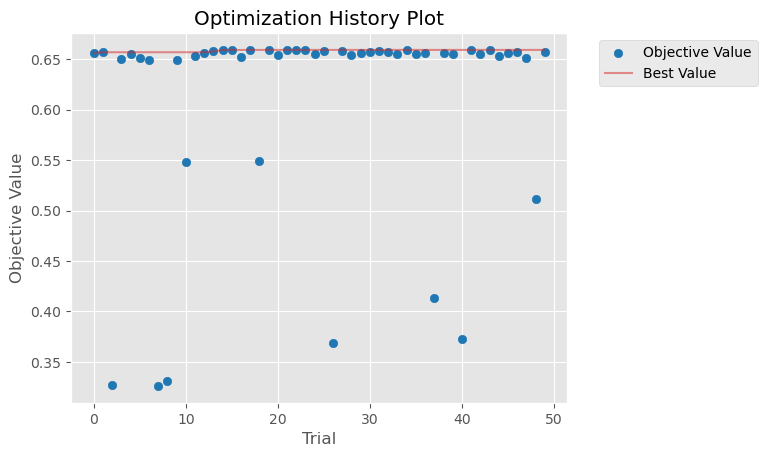

/tmp/nix-shell-2620309-0/ipykernel_3293362/3786960669.py:3: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  ax2 = vis.plot_param_importances(study)


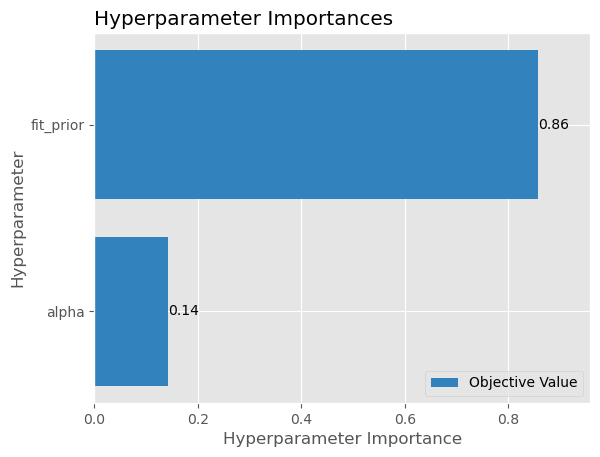

/tmp/nix-shell-2620309-0/ipykernel_3293362/3786960669.py:5: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  ax3 = vis.plot_slice(study)


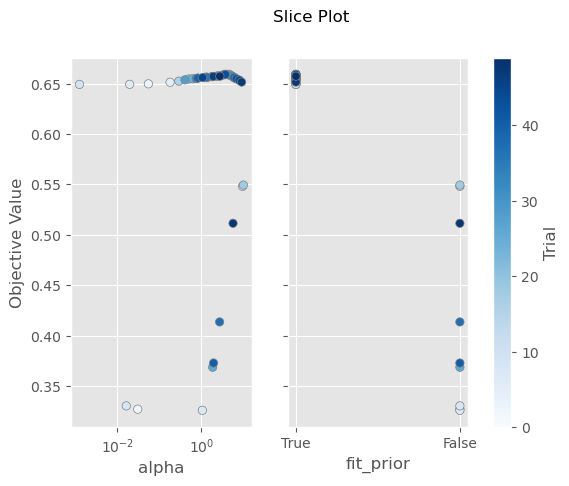

/tmp/nix-shell-2620309-0/ipykernel_3293362/3786960669.py:7: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  ax4 = vis.plot_parallel_coordinate(study)


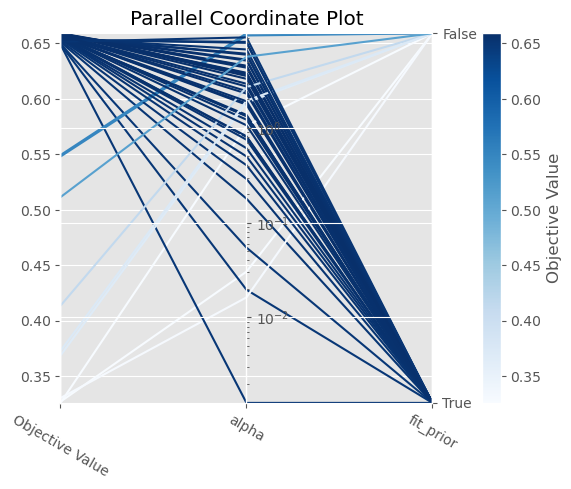

In [8]:
ax1 = vis.plot_optimization_history(study)
plt.show()
ax2 = vis.plot_param_importances(study)
plt.show()
ax3 = vis.plot_slice(study)
plt.show()
ax4 = vis.plot_parallel_coordinate(study)
plt.show()

### Evaluation

In [8]:
best_model = MultinomialNB(alpha=2.52, fit_prior=True)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')

print(f"\nMicro-average precision: {precision:.4f}")
print(f"Micro-average recall: {recall:.4f}")
print(f"Micro-average F1-score: {f1:.4f}")

Accuracy: 0.6231

Micro-average precision: 0.6231
Micro-average recall: 0.6231
Micro-average F1-score: 0.6231


In [9]:
print(classification_report(y_test, y_pred, target_names=preprocessor.label_encoder.classes_))

                               precision    recall  f1-score   support

               Asia – General       0.51      0.69      0.58      1378
                 Asia – South       0.00      0.00      0.00        26
             Asia – Southeast       0.00      0.00      0.00       178
  Central America & Caribbean       0.00      0.00      0.00        28
                      Chinese       0.45      0.43      0.44       380
             Europe – Eastern       0.50      0.01      0.01       170
             Europe – General       0.45      0.27      0.34      1221
            Europe – Northern       0.25      0.01      0.01       196
             Europe – Western       0.28      0.29      0.28      1058
                       French       0.66      0.19      0.30       610
                        Greek       0.00      0.00      0.00        52
                       Indian       0.00      0.00      0.00        91
                      Italian       0.59      0.68      0.63      1589
     

/nix/store/79zs2ym85hhnqnmf9ls5kl2rqwmbs0gm-python3-3.11.8-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nix/store/79zs2ym85hhnqnmf9ls5kl2rqwmbs0gm-python3-3.11.8-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nix/store/79zs2ym85hhnqnmf9ls5kl2rqwmbs0gm-python3-3.11.8-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

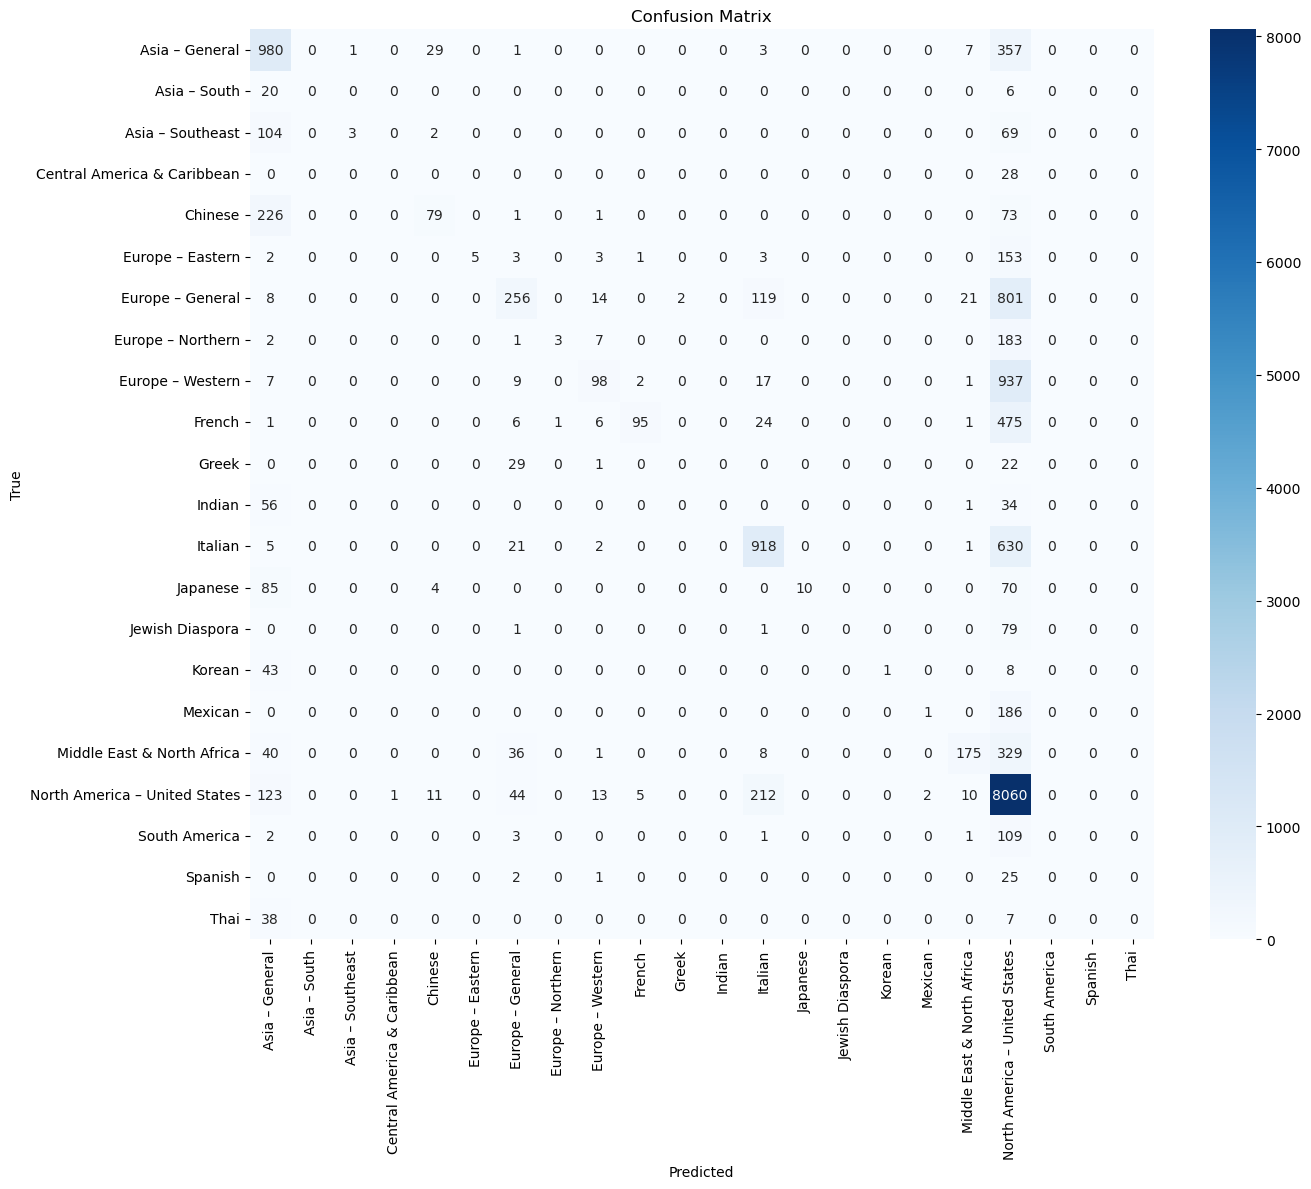

In [10]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=preprocessor.label_encoder.classes_, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [15]:
def predict_cuisine(model, steps_vec, ingredients_vec, recipe_steps, recipe_ingredients, n_steps, n_ingredients, label_encoder, top_n=3):
    """
    Predict top N cuisine types for a new recipe with probabilities
    
    Parameters:
    -----------
    model: trained classifier model
    steps_vec: fitted TF-IDF vectorizer for steps
    ingredients_vec: fitted TF-IDF vectorizer for ingredients
    recipe_steps: list of recipe steps
    recipe_ingredients: list of recipe ingredients
    n_steps: number of steps
    n_ingredients: number of ingredients
    label_encoder: fitted label encoder
    top_n: number of top predictions to return (default: 3)
    
    Returns:
    --------
    list of tuples (cuisine, probability) for top N predictions
    """
    # Prepare steps and ingredients text
    steps_text = ' '.join(recipe_steps)
    ingredients_text = ' '.join(recipe_ingredients)
    
    # Transform text data
    steps_features = steps_vec.transform([steps_text]).toarray()
    ingredients_features = ingredients_vec.transform([ingredients_text]).toarray()
    
    # Create token statistics
    tokens = [token for token in steps_text.split()]
    #token_count = len(tokens)
    #avg_token_length = np.mean([len(token) for token in tokens]) if tokens else 0
    
    # Combine all features
    numerical_features = np.array([[n_steps, n_ingredients]])
    X_new = np.hstack([steps_features, ingredients_features, numerical_features])
    
    # Get probability predictions for all classes
    proba = model.predict_proba(X_new)[0]
    
    # Get indices of top N predictions in descending order of probability
    top_indices = proba.argsort()[-top_n:][::-1]
    
    # Map indices to cuisine names and create (cuisine, probability) tuples
    top_predictions = []
    for idx in top_indices:
        cuisine = label_encoder.inverse_transform([idx])[0]
        probability = proba[idx]
        top_predictions.append((cuisine, probability))
    
    return top_predictions

# Test with sample recipes
print("\n===== Testing with sample recipes =====")

# Sample recipe 1
sample_recipe = test_data.iloc[30]
top_predictions = predict_cuisine(
    best_model, preprocessor.steps_vectorizer, preprocessor.ingredients_vectorizer,
    sample_recipe['steps'], sample_recipe['ingredients'],
    sample_recipe['n_steps'], sample_recipe['n_ingredients'],
    preprocessor.label_encoder
)

print(f"\nSample Recipe #1: {sample_recipe['name']}")
print(f"Actual cuisine: {' '.join(sample_recipe['cuisines'])}")
print("Top 3 predicted cuisines:")
for i, (cuisine, prob) in enumerate(top_predictions, 1):
    print(f"  {i}. {cuisine} (probability: {prob:.4f})")

# Sample recipe 2
sample_recipe = test_data.iloc[20]
top_predictions = predict_cuisine(
    best_model, preprocessor.steps_vectorizer, preprocessor.ingredients_vectorizer,
    sample_recipe['steps'], sample_recipe['ingredients'],
    sample_recipe['n_steps'], sample_recipe['n_ingredients'],
    preprocessor.label_encoder
)

print(f"\nSample Recipe #2: {sample_recipe['name']}")
print(f"Actual cuisine: {' '.join(sample_recipe['cuisines'])}")
print("Top 3 predicted cuisines:")
for i, (cuisine, prob) in enumerate(top_predictions, 1):
    print(f"  {i}. {cuisine} (probability: {prob:.4f})")

# Try one more sample
sample_recipe = test_data.iloc[1000]
top_predictions = predict_cuisine(
    best_model, preprocessor.steps_vectorizer, preprocessor.ingredients_vectorizer,
    sample_recipe['steps'], sample_recipe['ingredients'],
    sample_recipe['n_steps'], sample_recipe['n_ingredients'],
    preprocessor.label_encoder
)

print(f"\nSample Recipe #3: {sample_recipe['name']}")
print(f"Actual cuisine: {' '.join(sample_recipe['cuisines'])}")
print("Top 3 predicted cuisines:")
for i, (cuisine, prob) in enumerate(top_predictions, 1):
    print(f"  {i}. {cuisine} (probability: {prob:.4f})")


===== Testing with sample recipes =====

Sample Recipe #1: ramen shrimp pouch
Actual cuisine: Asia – General
Top 3 predicted cuisines:
  1. Chinese (probability: 0.4899)
  2. Asia – General (probability: 0.3094)
  3. North America – United States (probability: 0.0731)

Sample Recipe #2: toad hole
Actual cuisine: 
Top 3 predicted cuisines:
  1. North America – United States (probability: 0.5801)
  2. Europe – Western (probability: 0.3083)
  3. French (probability: 0.0347)

Sample Recipe #3: bacon egg empanadas
Actual cuisine: 
Top 3 predicted cuisines:
  1. North America – United States (probability: 0.7576)
  2. Europe – Western (probability: 0.1429)
  3. French (probability: 0.0488)
